In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cr_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          8.2380 ( 7.9914,  8.3305) ( 8.0488,  8.3375)  0.2887 (Jnode 106)\n',
 't_n56          8.1841 ( 7.9108,  8.3149) ( 7.9743,  8.3301)  0.3558 (Jnode 105)\n',
 't_n57          7.8427 ( 7.5748,  8.0171) ( 7.6148,  8.0372)  0.4224 (Jnode 104)\n',
 't_n58          7.2440 ( 6.9672,  7.4848) ( 6.9832,  7.4968)  0.5136 (Jnode 103)\n',
 't_n59          7.0730 ( 6.7964,  7.3243) ( 6.8104,  7.3341)  0.5236 (Jnode 102)\n',
 't_n60          6.8517 ( 6.5676,  7.1200) ( 6.5762,  7.1253)  0.5491 (Jnode 101)\n',
 't_n61          6.4880 ( 6.1514,  6.8110) ( 6.1631,  6.8202)  0.6571 (Jnode 100)\n',
 't_n62          3.8946 ( 2.4106,  4.9584) ( 2.7025,  5.1312)  2.4288 (Jnode 99)\n',
 't_n63          5.3329 ( 4.7816,  5.8659) ( 4.7759,  5.8576)  1.0817 (Jnode 98)\n',
 't_n64          4.3743 ( 3.6911,  5.0375) ( 3.6832,  5.0262)  1.3430 (Jnode 97)\n',
 't_n65          3.9627 ( 3.2634,  4.6744) ( 3.2218,  4.6064)  1.3846 (Jnode 96)\n',
 't_n66          3.2792 ( 2.5801,  4.0447) ( 2.5256,  3.96

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[8.238,
 8.1841,
 7.8427,
 7.244,
 7.073,
 6.8517,
 6.488,
 3.8946,
 5.3329,
 4.3743,
 3.9627,
 3.2792,
 2.3802,
 1.6557,
 0.8044,
 4.3005,
 6.9083,
 6.358,
 6.4968,
 5.12,
 4.5658,
 5.2221,
 6.8438,
 6.5817,
 6.3906,
 6.1376,
 5.7775,
 5.6235,
 5.0848,
 4.7314,
 4.3857,
 3.5845,
 3.2558,
 5.1705,
 4.3892,
 6.7309,
 2.1409,
 6.5969,
 6.2717,
 5.793,
 5.4749,
 4.3633,
 4.8311,
 5.5527,
 5.2896,
 4.7606,
 3.989,
 4.8053,
 7.3769,
 6.0473,
 4.2046,
 3.923,
 6.1545]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cr_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[8.2351,
 8.1831,
 7.8003,
 7.2715,
 7.0746,
 6.8148,
 6.4195,
 4.0747,
 5.3769,
 4.4653,
 4.0182,
 3.3143,
 2.4125,
 1.6939,
 0.8328,
 4.3638,
 6.8532,
 5.9805,
 6.4305,
 5.1471,
 4.5115,
 5.2452,
 6.9001,
 6.6225,
 6.4158,
 6.1489,
 5.8045,
 5.6179,
 5.1093,
 4.733,
 4.3636,
 3.6356,
 3.2462,
 5.2027,
 4.4162,
 6.7629,
 2.801,
 6.6043,
 6.2802,
 5.8111,
 5.4784,
 4.4257,
 4.8271,
 5.5866,
 5.2054,
 4.5232,
 4.1161,
 4.8933,
 7.3254,
 6.0679,
 4.2593,
 4.2254,
 6.4094]

In [12]:
posterior_mean_iqtree

[8.238,
 8.1841,
 7.8427,
 7.244,
 7.073,
 6.8517,
 6.488,
 3.8946,
 5.3329,
 4.3743,
 3.9627,
 3.2792,
 2.3802,
 1.6557,
 0.8044,
 4.3005,
 6.9083,
 6.358,
 6.4968,
 5.12,
 4.5658,
 5.2221,
 6.8438,
 6.5817,
 6.3906,
 6.1376,
 5.7775,
 5.6235,
 5.0848,
 4.7314,
 4.3857,
 3.5845,
 3.2558,
 5.1705,
 4.3892,
 6.7309,
 2.1409,
 6.5969,
 6.2717,
 5.793,
 5.4749,
 4.3633,
 4.8311,
 5.5527,
 5.2896,
 4.7606,
 3.989,
 4.8053,
 7.3769,
 6.0473,
 4.2046,
 3.923,
 6.1545]

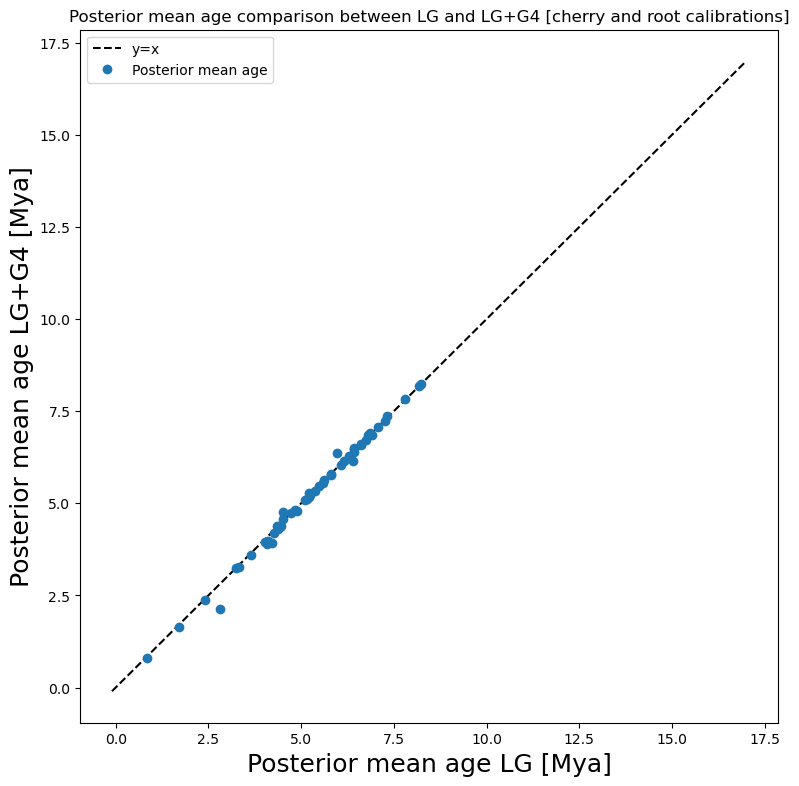

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_cr_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')